In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
# load the data
data=pd.read_csv('INX_Future_Inc_Employee_Performance.csv')

In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
# checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
# fetching numerical column
num_data=data.select_dtypes(include=['int64'])
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [6]:
# fetching categorical column
cat_data=data.select_dtypes(include=['object'])
cat_data.columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

# Exploratory Data Analysis

## Univariate Analysis
      It is used to analyze a single variable and understand its distribution.

### Numerical columns

In [7]:
# create a separate dataframe for continuous data
data1=data[['Age', 'DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','NumCompaniesWorked',
       'TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

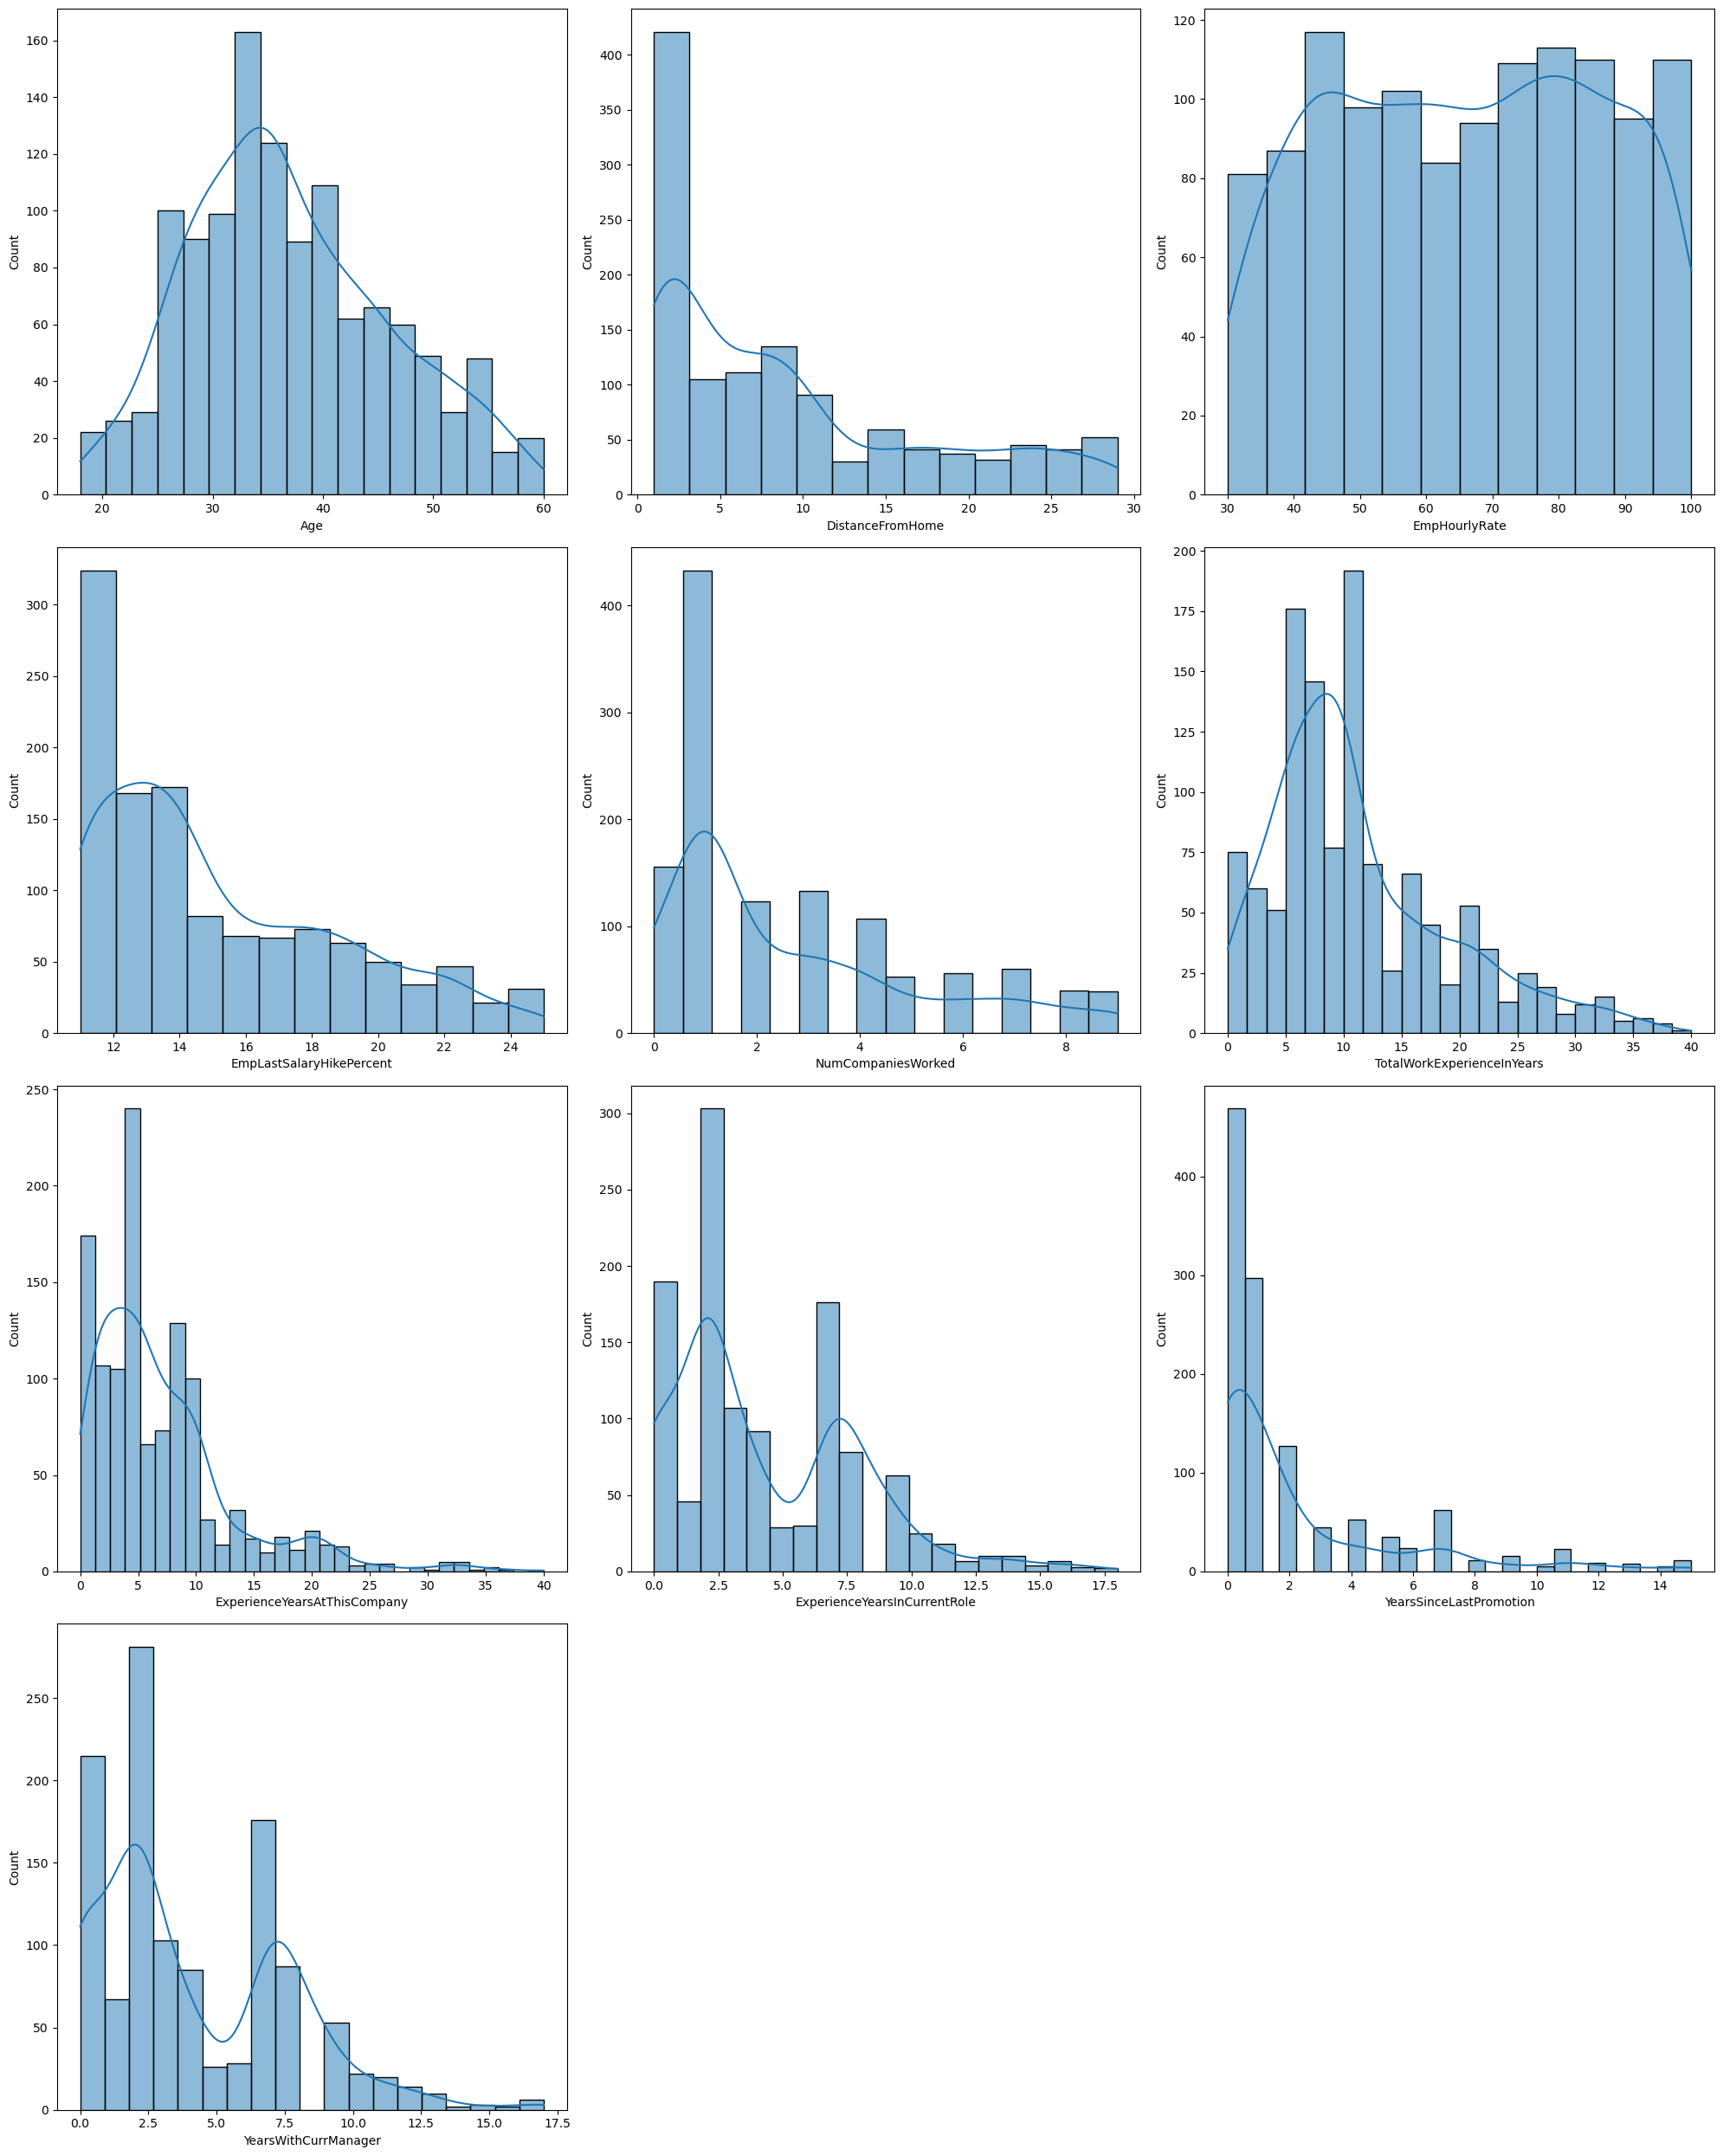

In [8]:
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data1:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(data=data1,x=data1[column],kde=True)
    plotnumber+=1
plt.tight_layout()

## Key Findings from Univariate Analysis of Numeric Columns

* The age of employees ranges from 18 to 60, with the majority falling in the age group of 30 to 40.

* Most employees live within a 0 to 10 km distance from the workplace.

* The majority of employees received a salary hike of below 14%.

* Most employees are freshers and have previously worked in only one company.

* The majority of employees have 5 to 10 years of experience, followed by 0 to 5 years of experience.

* Nearly 80% of employees have been working at this company for 0 to 10 years.

* Most employees have received a recent promotion.

* The majority of employees have been working with their current manager for less than 5 years.

In [9]:
# create a separate dataframe for discrete data
data2=data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
            'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance','PerformanceRating']]

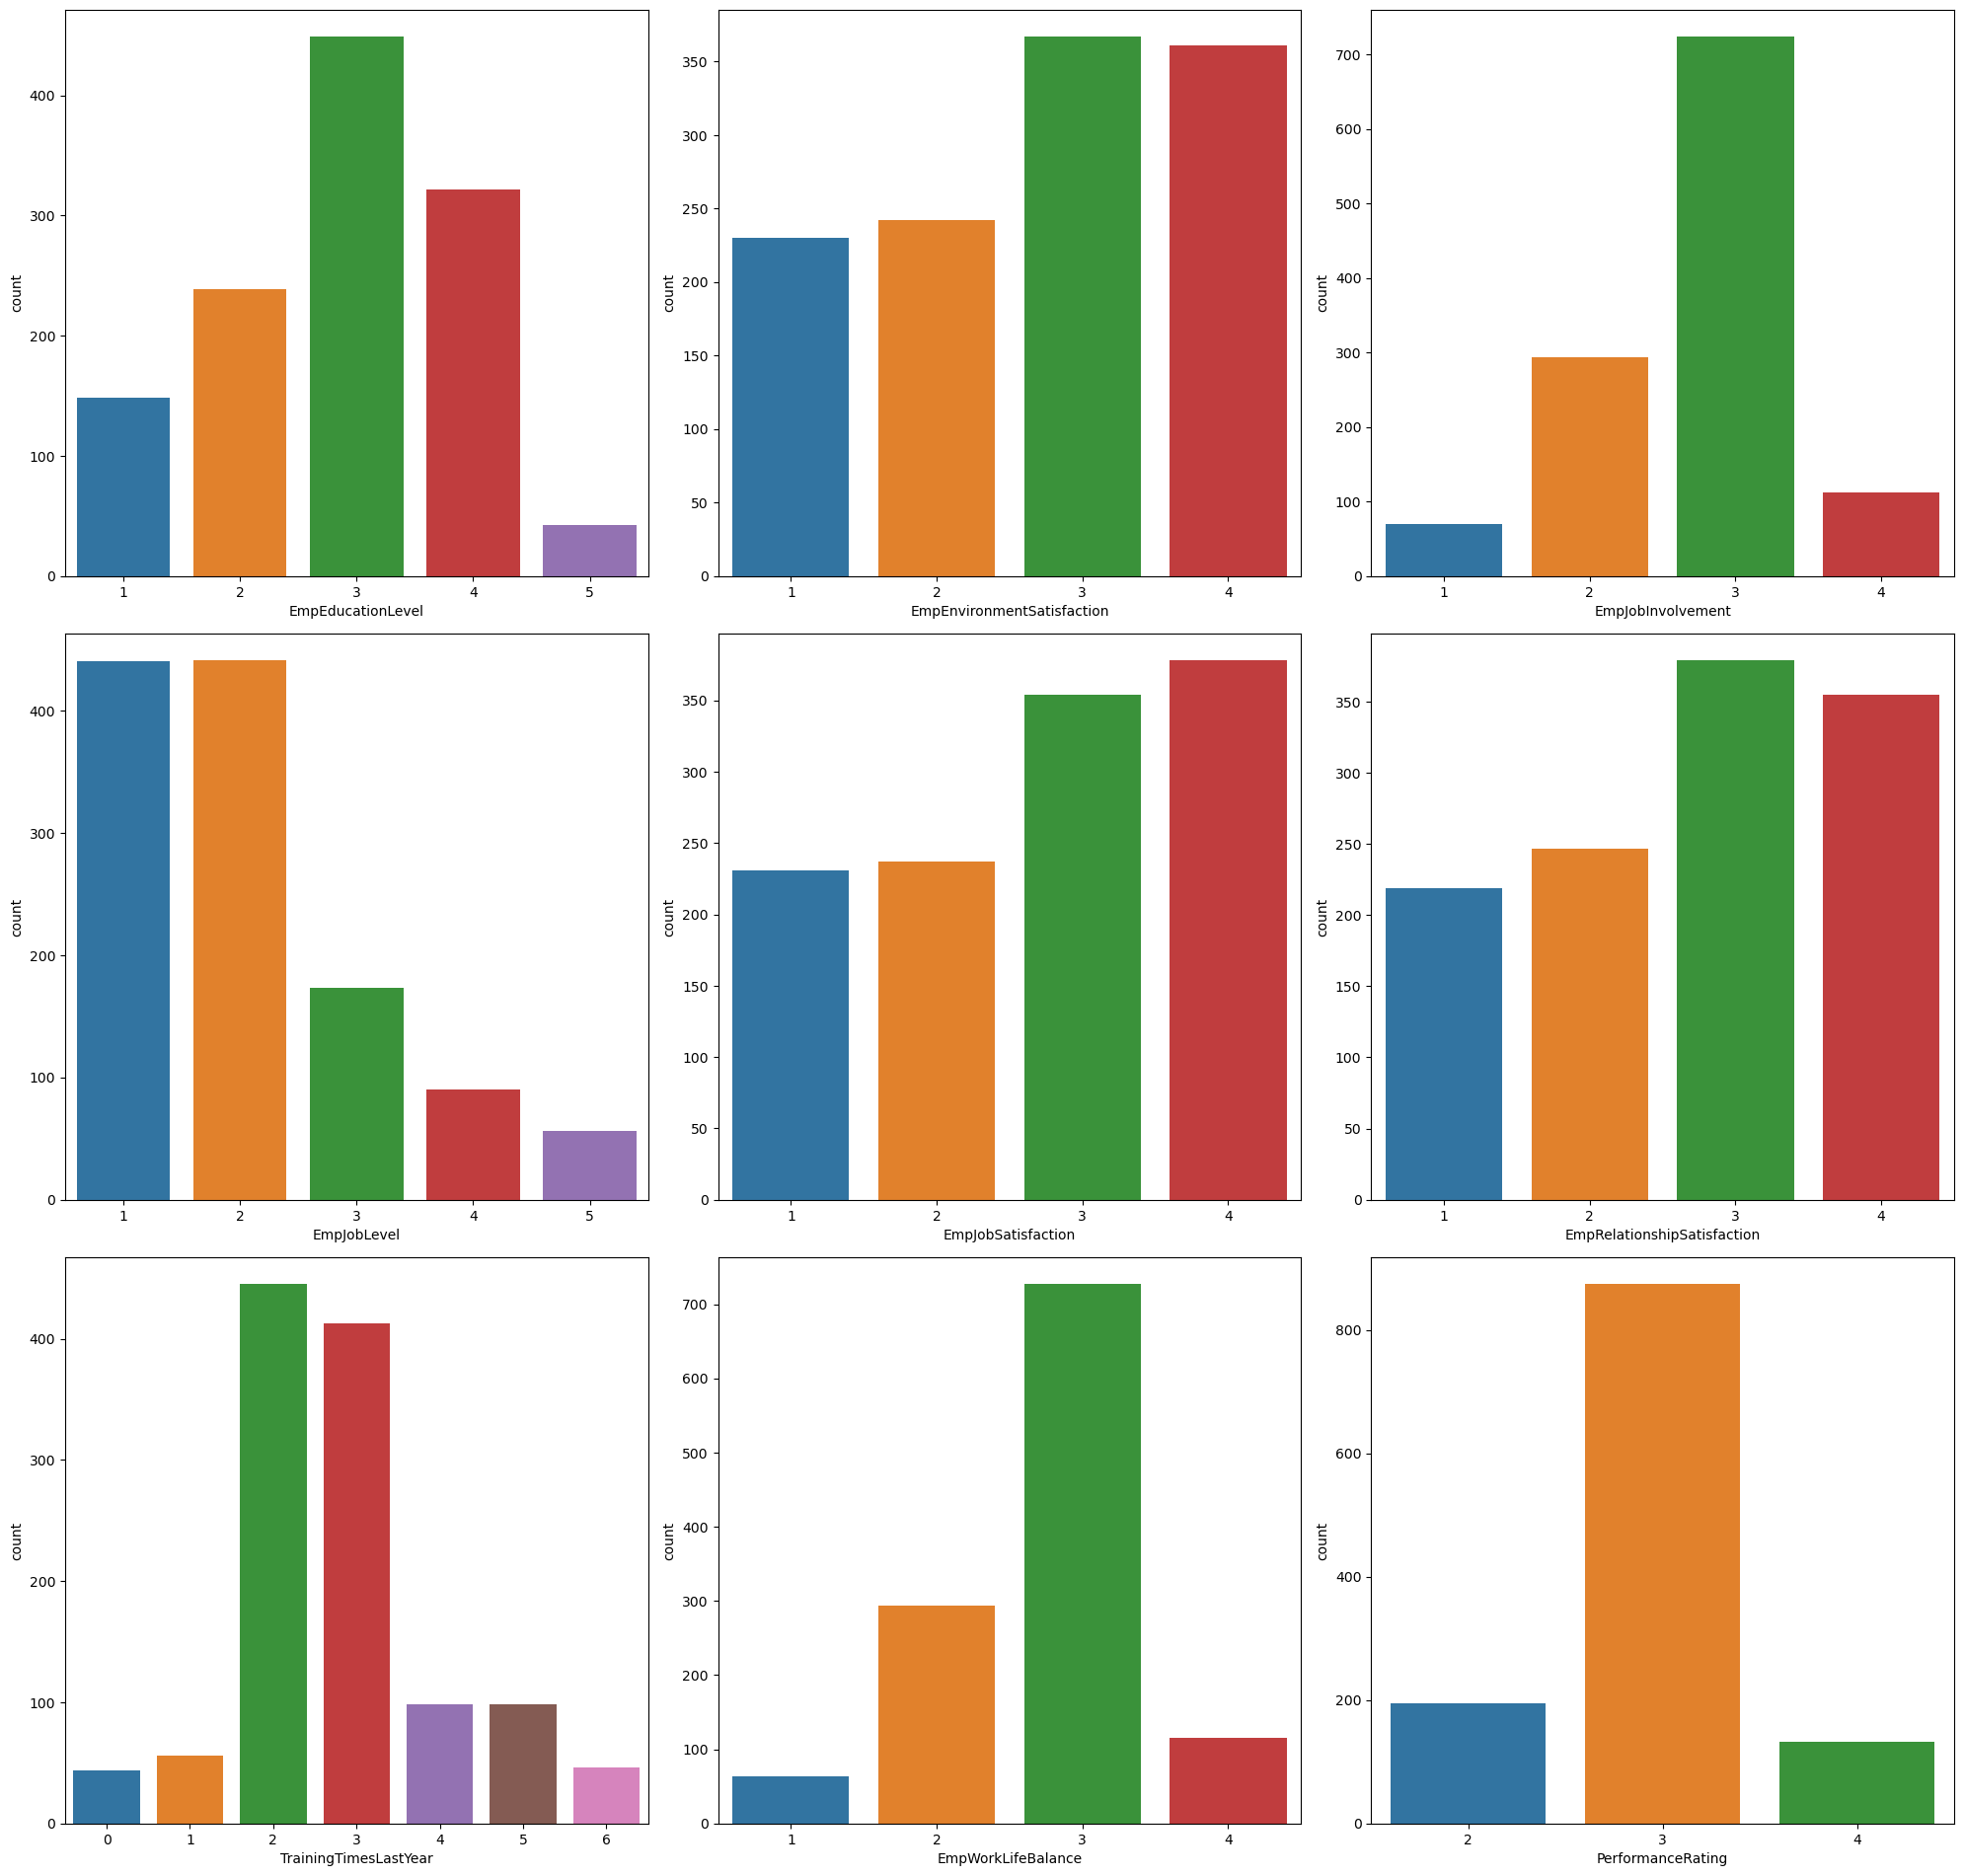

In [10]:
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data2:
    if plotnumber<=9:
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(data=data2,x=data2[column])
    plotnumber+=1
plt.tight_layout()

## Key Findings from Univariate Analysis of Discrete Columns

* There are nearly 450 employees with a graduation degree, 300 employees with a postgraduate degree, and fewer than 50 employees with a doctorate.

* Employees generally express high satisfaction with the work environment.

* The majority of employees have a high level of job involvement, with fewer than 80 employees having lower job involvement.

* Most employees belong to job levels 1 and 2.

* Employees tend to have high job satisfaction.

* The majority of employees received training 2 to 3 times in the last year.

* Most employees perceive their work-life balance as 'better'.

* Regarding performance ratings, nearly 850 employees received an 'excellent' rating, 100 employees received an 'outstanding' rating, and 200 employees received a 'good' rating.

## Categorical columns

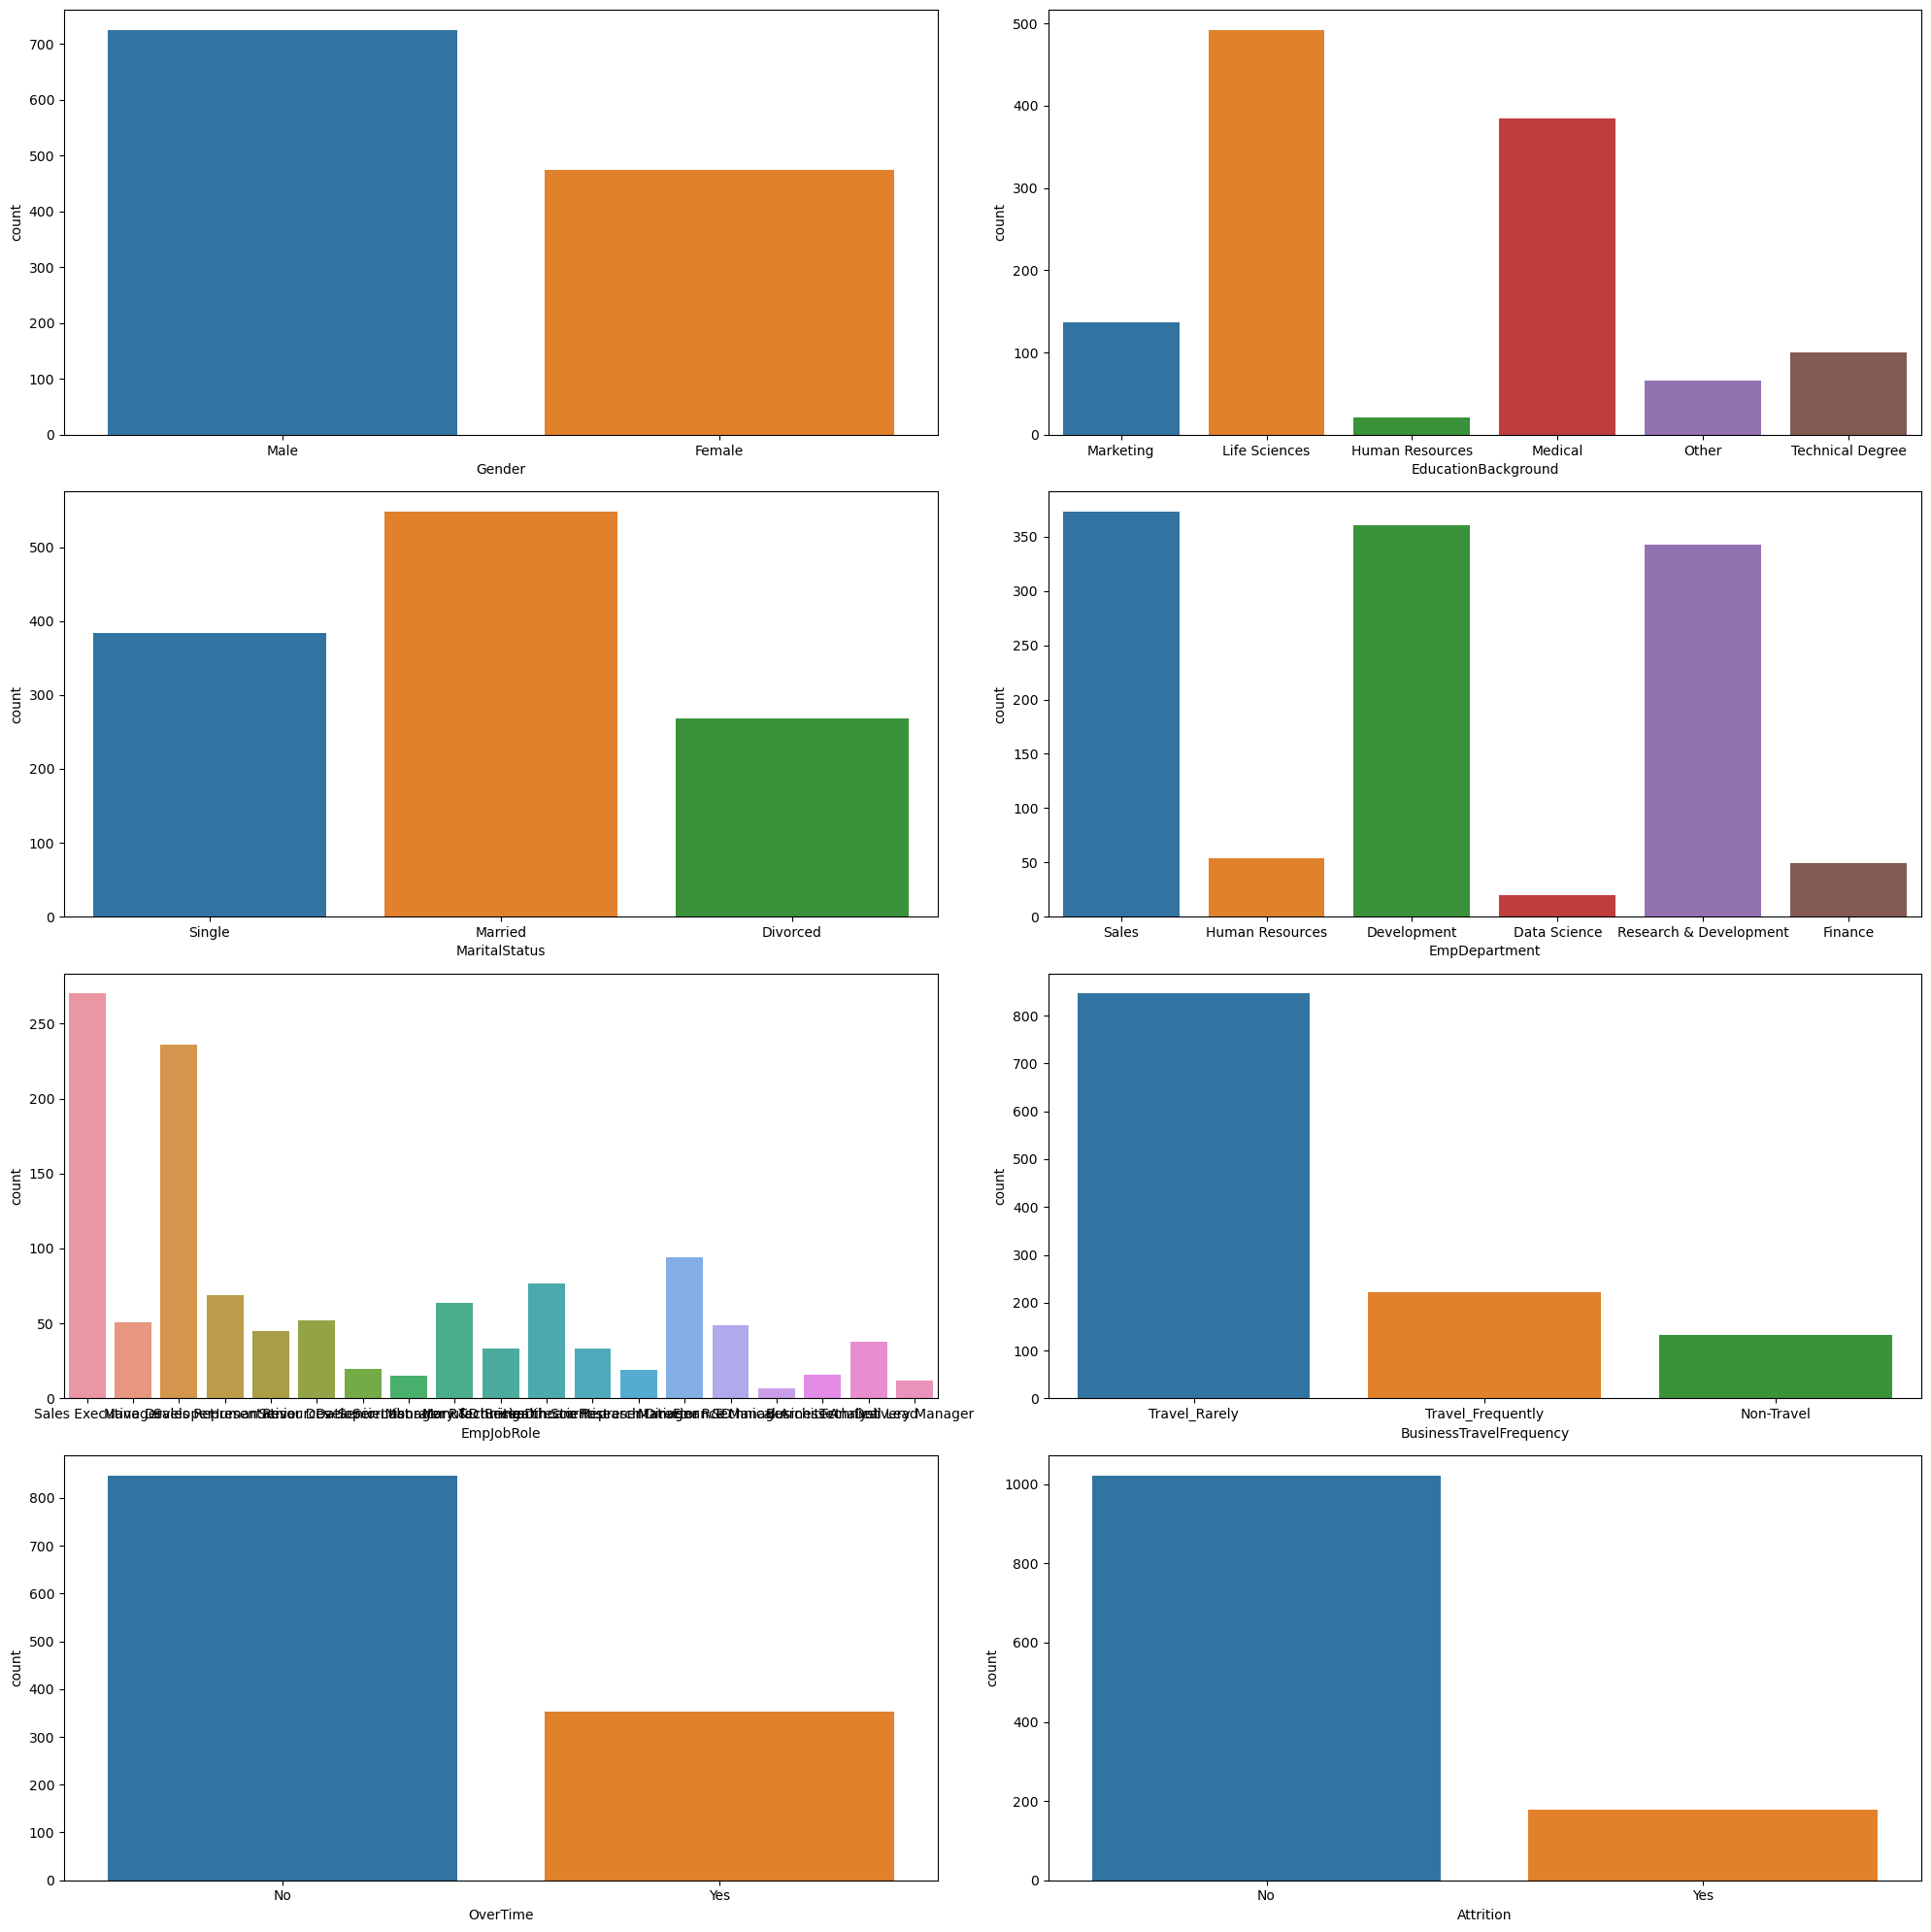

In [11]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in cat_data.drop('EmpNumber',axis=1):
  if plotnumber<=8:
    ax=plt.subplot(4,2,plotnumber)
    sns.countplot(data=data,x=data[i])
  plotnumber+=1
plt.tight_layout()

## Key Findings from Univariate Analysis of Categorical Columns

* There are more than 700 male employees and nearly 450 female employees.

* The majority of employees have backgrounds in Life Science and Medical fields.

* Most employees are married, followed by single and divorced employees.

* The Sales department has the highest number of employees, followed by the Development and R&D departments. The Data Science department has relatively few employees.

* More than 800 employees travel rarely, while 200 employees travel frequently.

* Over 800 employees do not work overtime.

* More than 1000 employees have not left the company.

# Bivariate Analysis
          It is used to analyze two variables, one as the input feature and other as the target variable.

## Numerical columns Vs Performance Rating

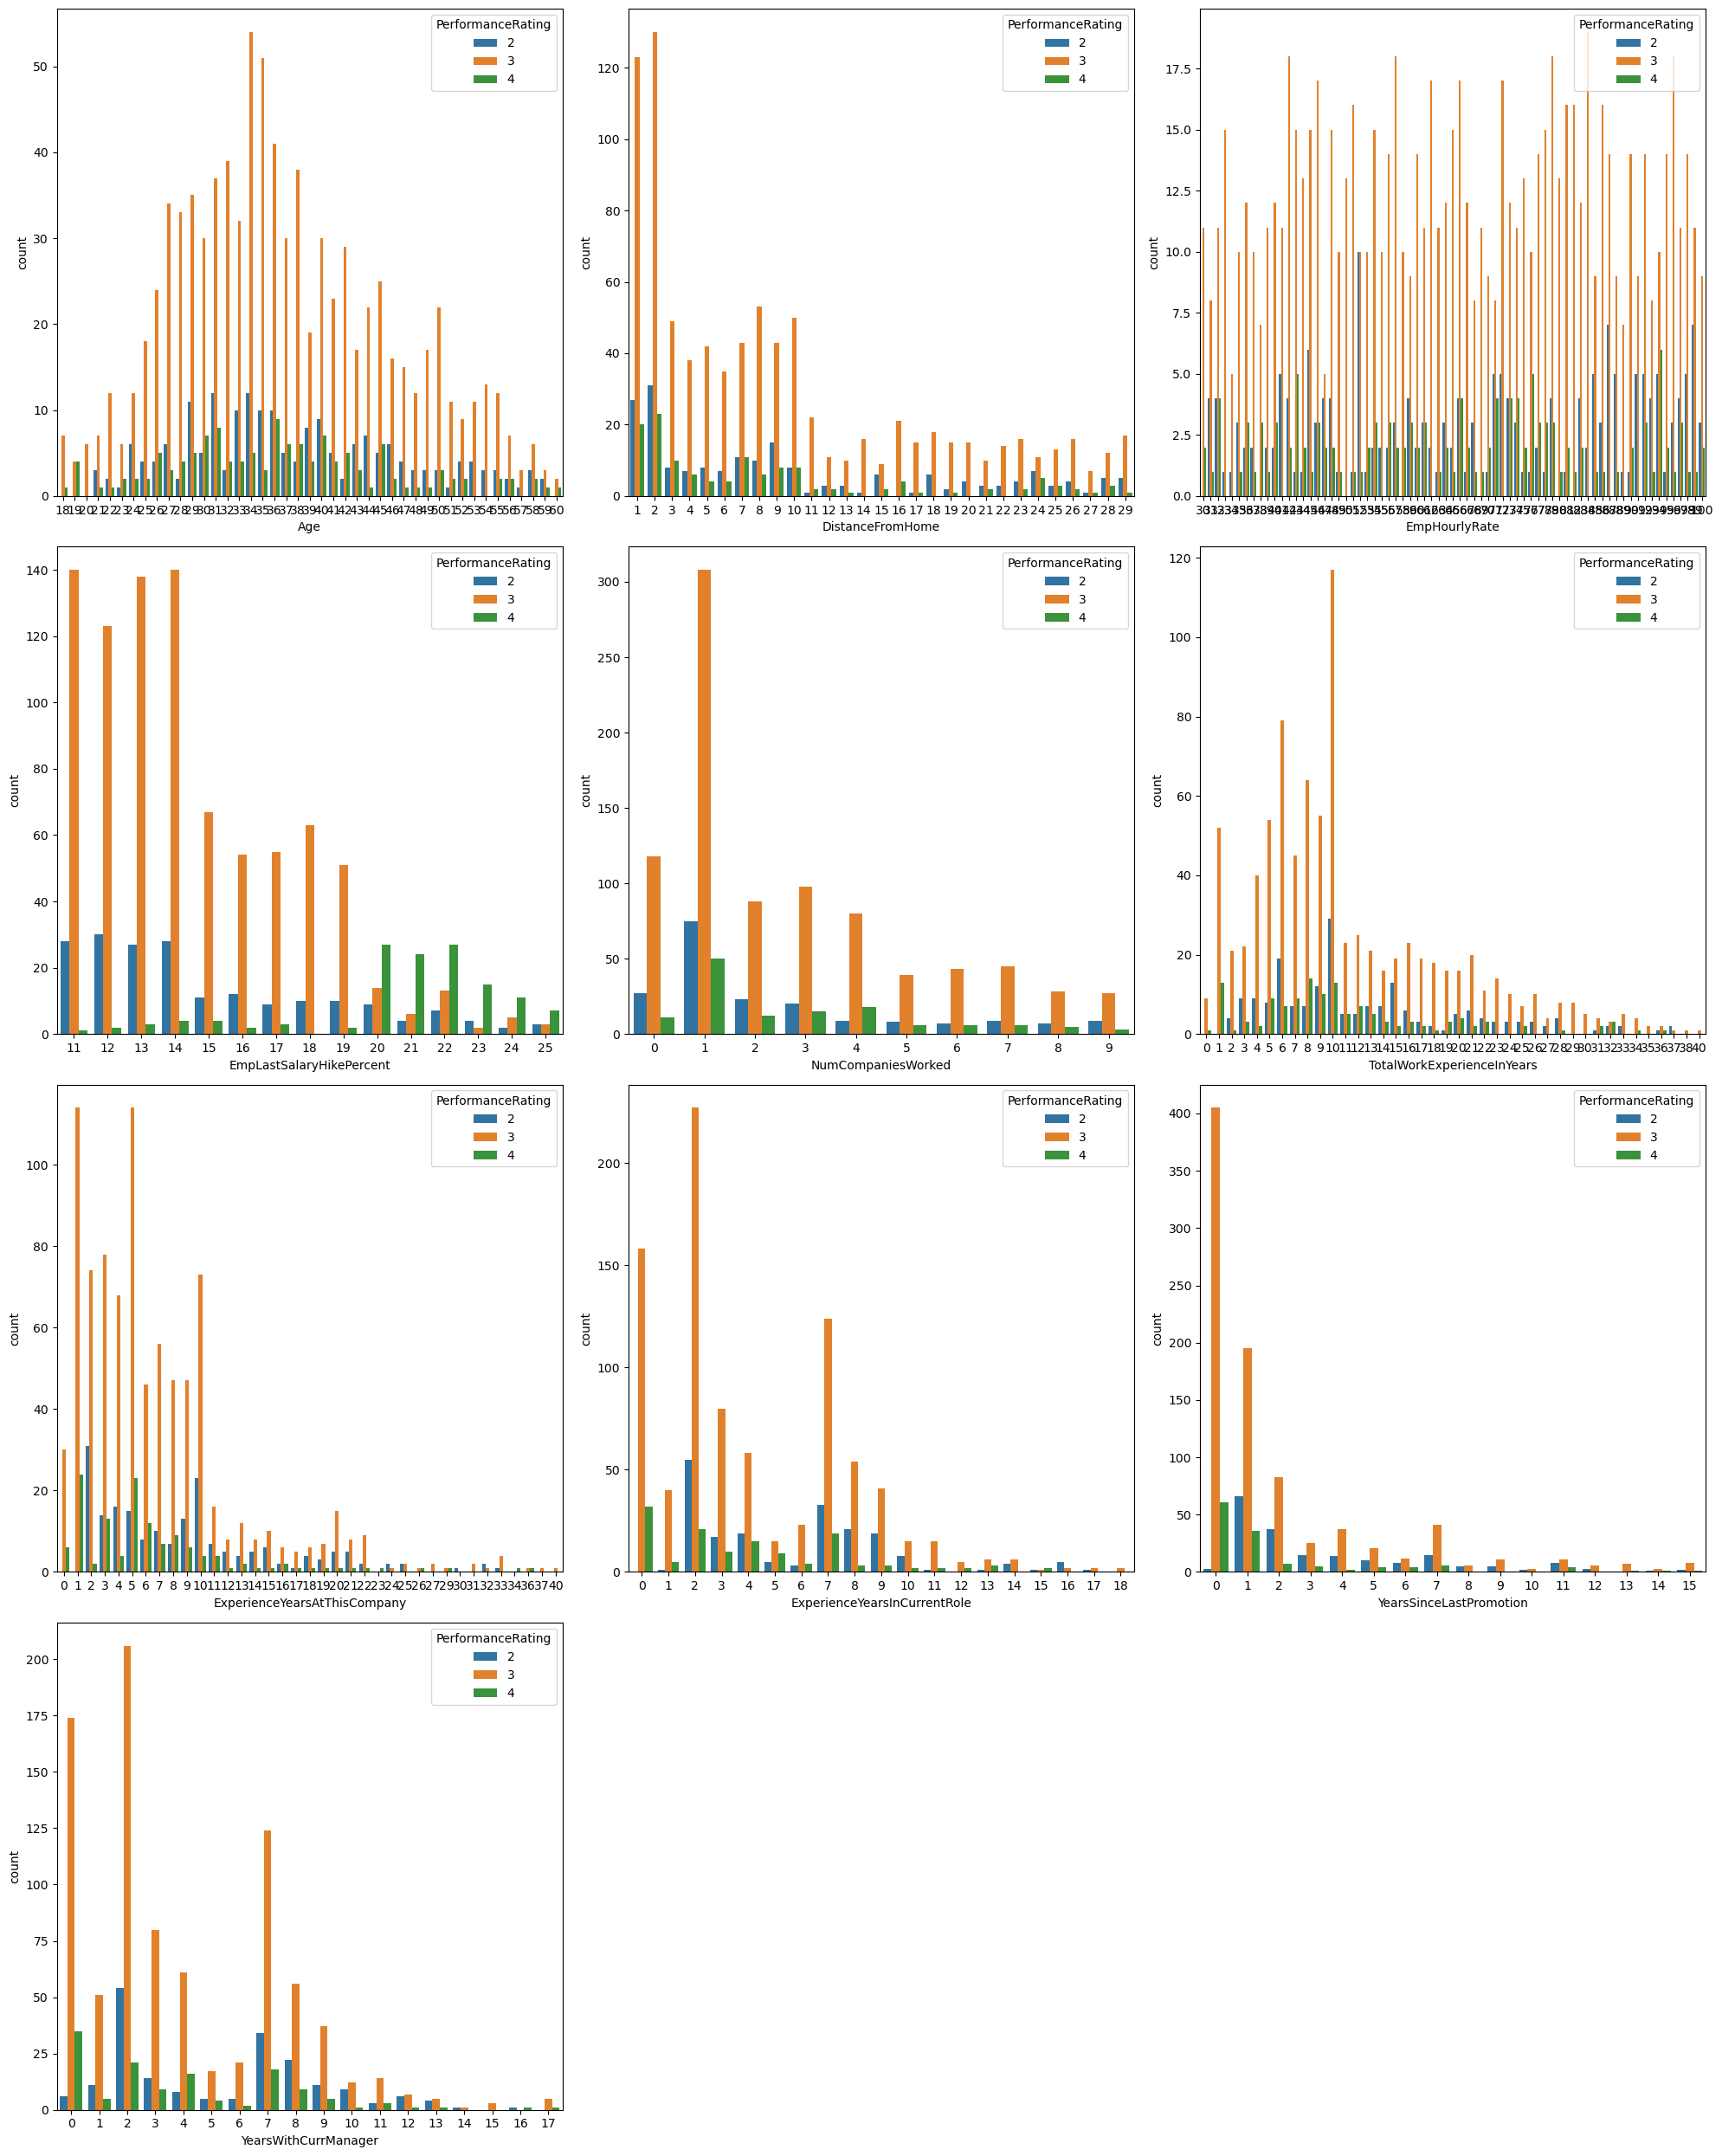

In [12]:
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data1:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(data=data1,x=data1[column],hue=data['PerformanceRating'])
    plotnumber+=1
plt.tight_layout()

## Key Findings from Bivariate Analysis of Numeric Variables and Performance Ratings

* Employees between the ages of 30 to 50 tended to have excellent performance ratings.

* Employees located near the workplace generally received excellent and outstanding performance ratings.

* Employees who received a salary hike of more than 20% tended to have outstanding performance.

* Employees who had worked for fewer than 2 companies in the past typically demonstrated excellent performance.

* Employees with 10 years of experience or less, including those with less than 10 years, tended to have excellent and outstanding performance. However, as years of experience exceeded 10, their performance tended to decrease.

* Employees who had worked at this company for less than 10 years tended to have excellent and outstanding performance.

* Employees who had been in their current role for less than 4 years tended to have excellent performance. However, those who had been in their current role for 5 to 6 years tended to have lower performance.

* Employees who were recently promoted tended to have excellent and outstanding performance.

* Employees who had worked with their current managers for less than 4 years tended to have excellent performance, especially fresher employees who demonstrated outstanding performance.

## Discrete column Vs Performance Rating

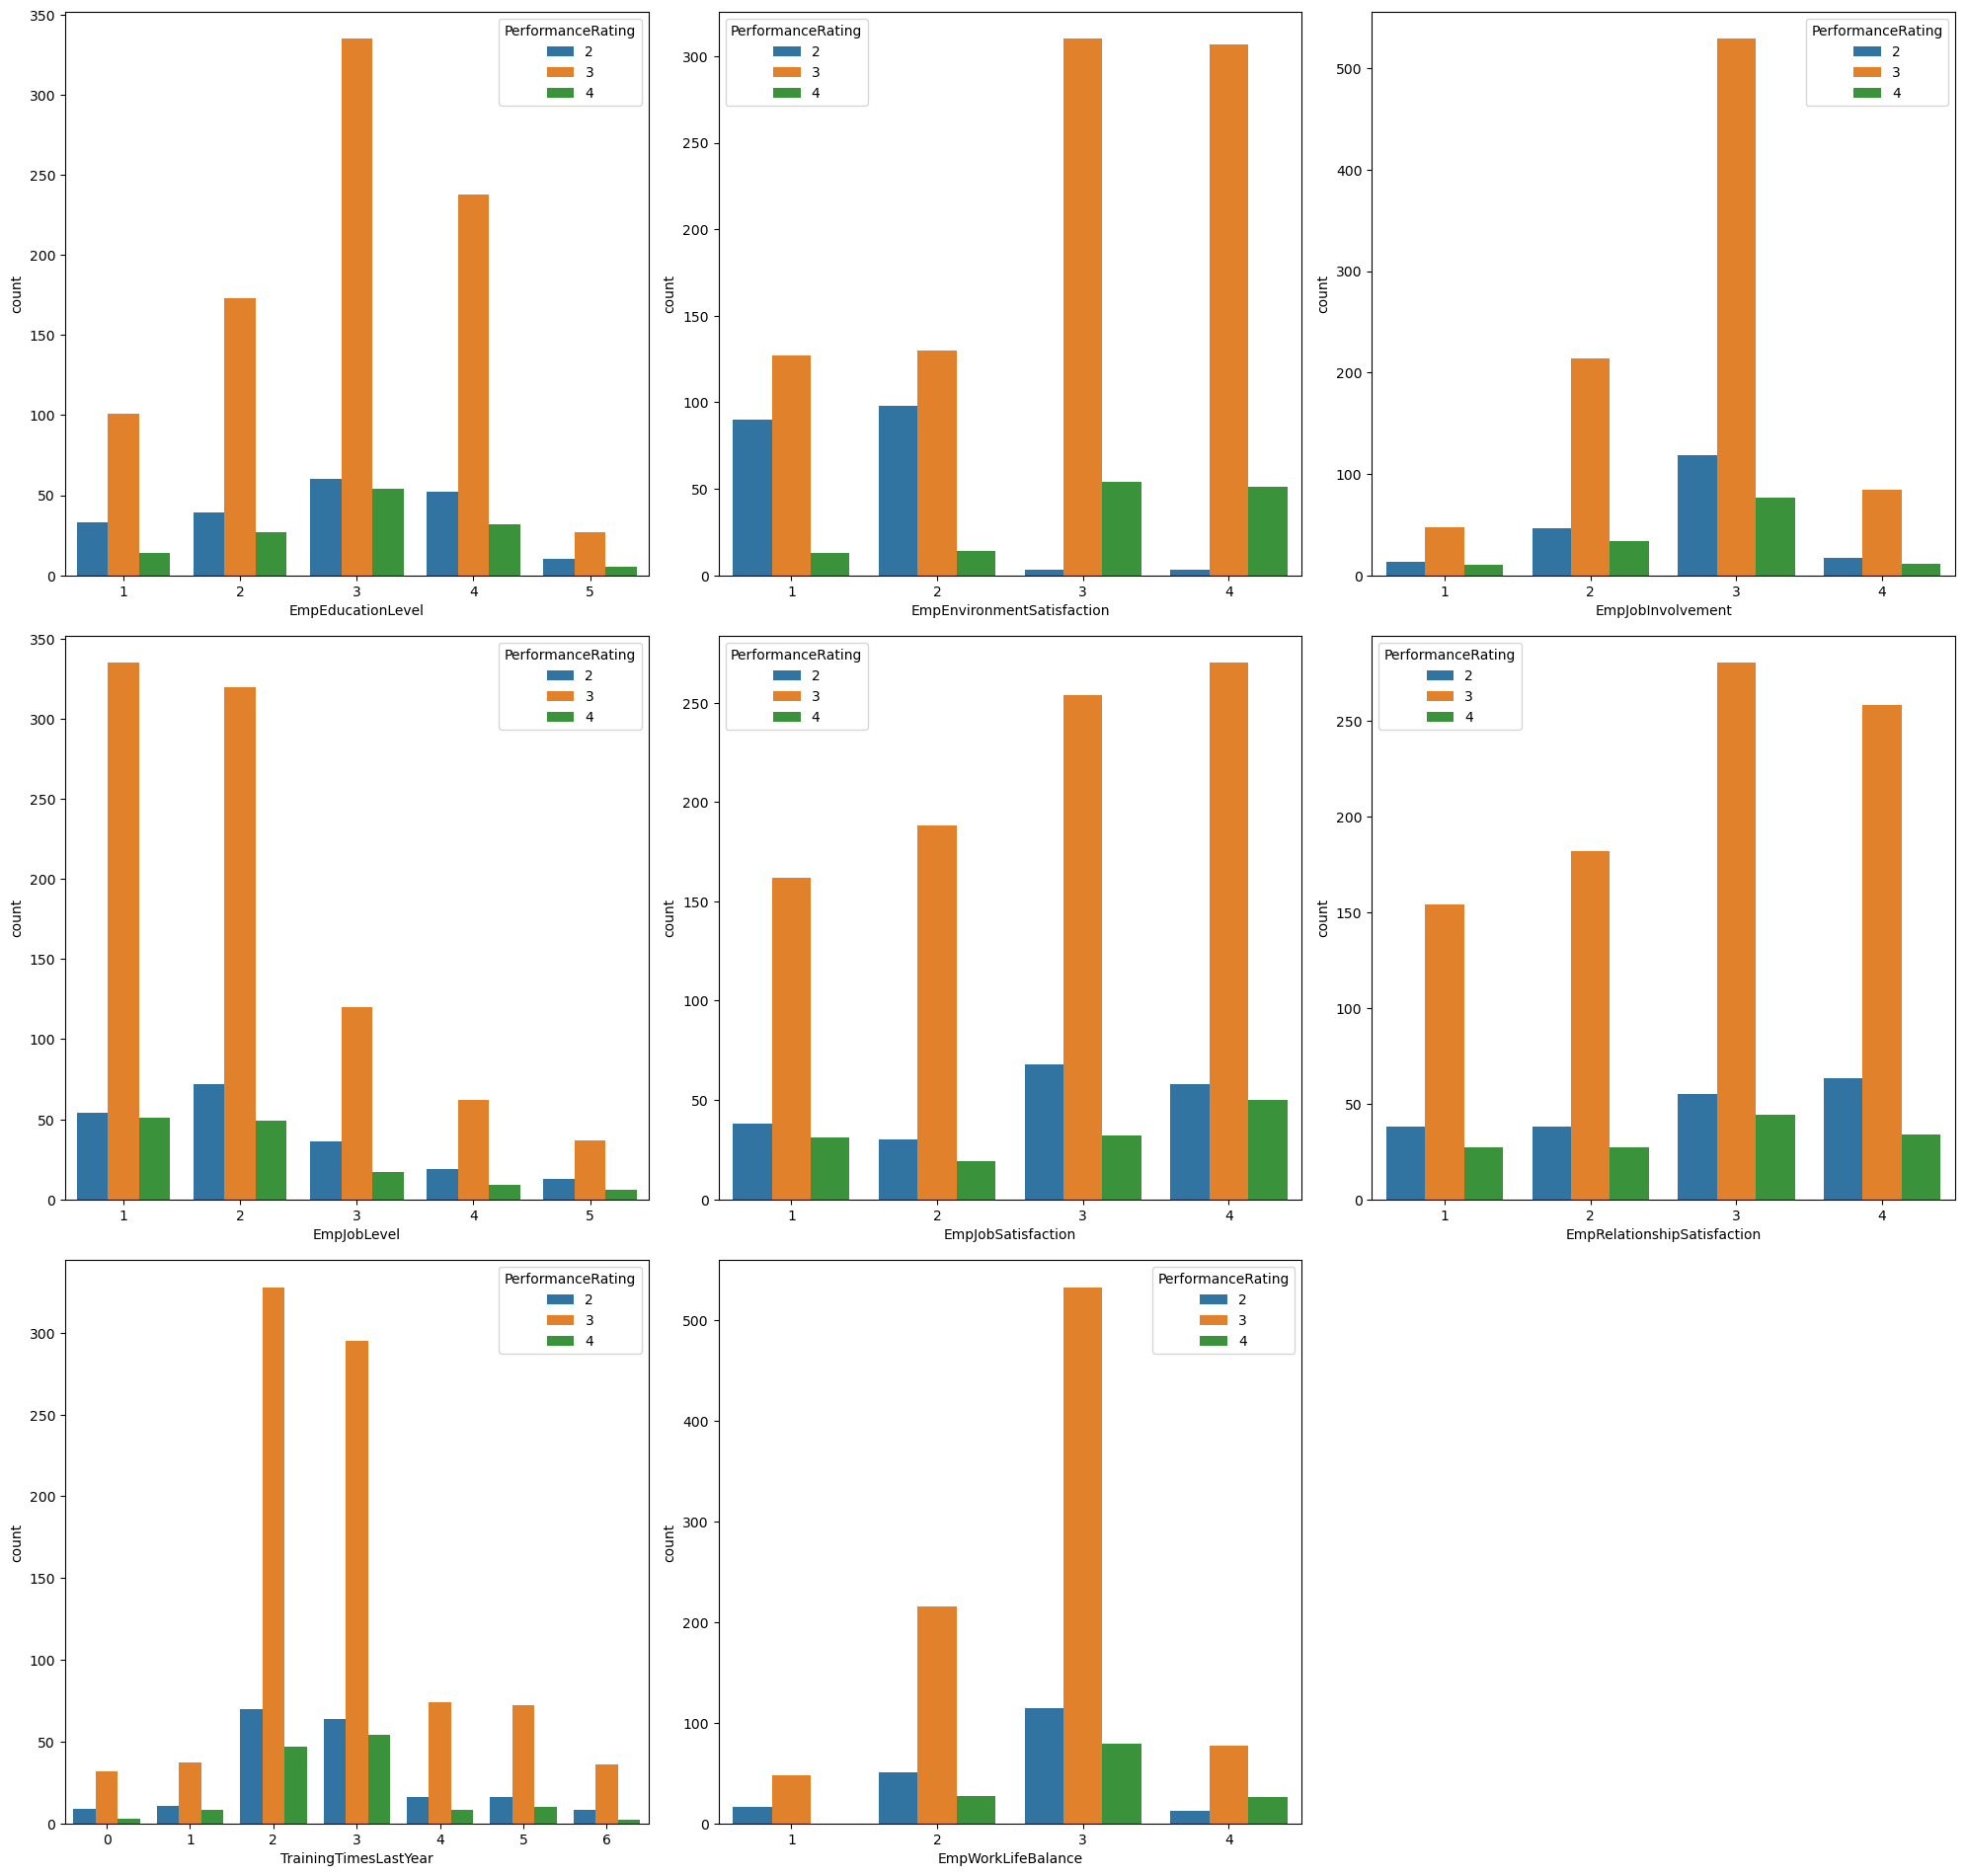

In [13]:
# plotting count plot
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data2:
    if plotnumber<=8:
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(data=data2,x=data2[column],hue=data['PerformanceRating'])
    plotnumber+=1
plt.tight_layout()

## Key Findings from Bivariate Analysis of Discrete Variables and Performance Ratings

* Employees who have graduated or completed post-graduate education tend to have excellent and outstanding performance.

* Employees who report high satisfaction with their work environment tend to exhibit excellent and outstanding performance.

* Employees with high job involvement tend to have excellent and outstanding performance, while those with low job involvement typically have lower performance.

* Employees in job levels 1 and 2 generally exhibit excellent and outstanding performance.

* Highly satisfied employees tend to demonstrate excellent and outstanding performance.

* Employees who received training 2 to 3 times in the last year tend to have good, excellent, and outstanding performance.

* Employees with a better work-life balance tend to exhibit excellent and outstanding performance.

## Categorical column Vs Performance Rating

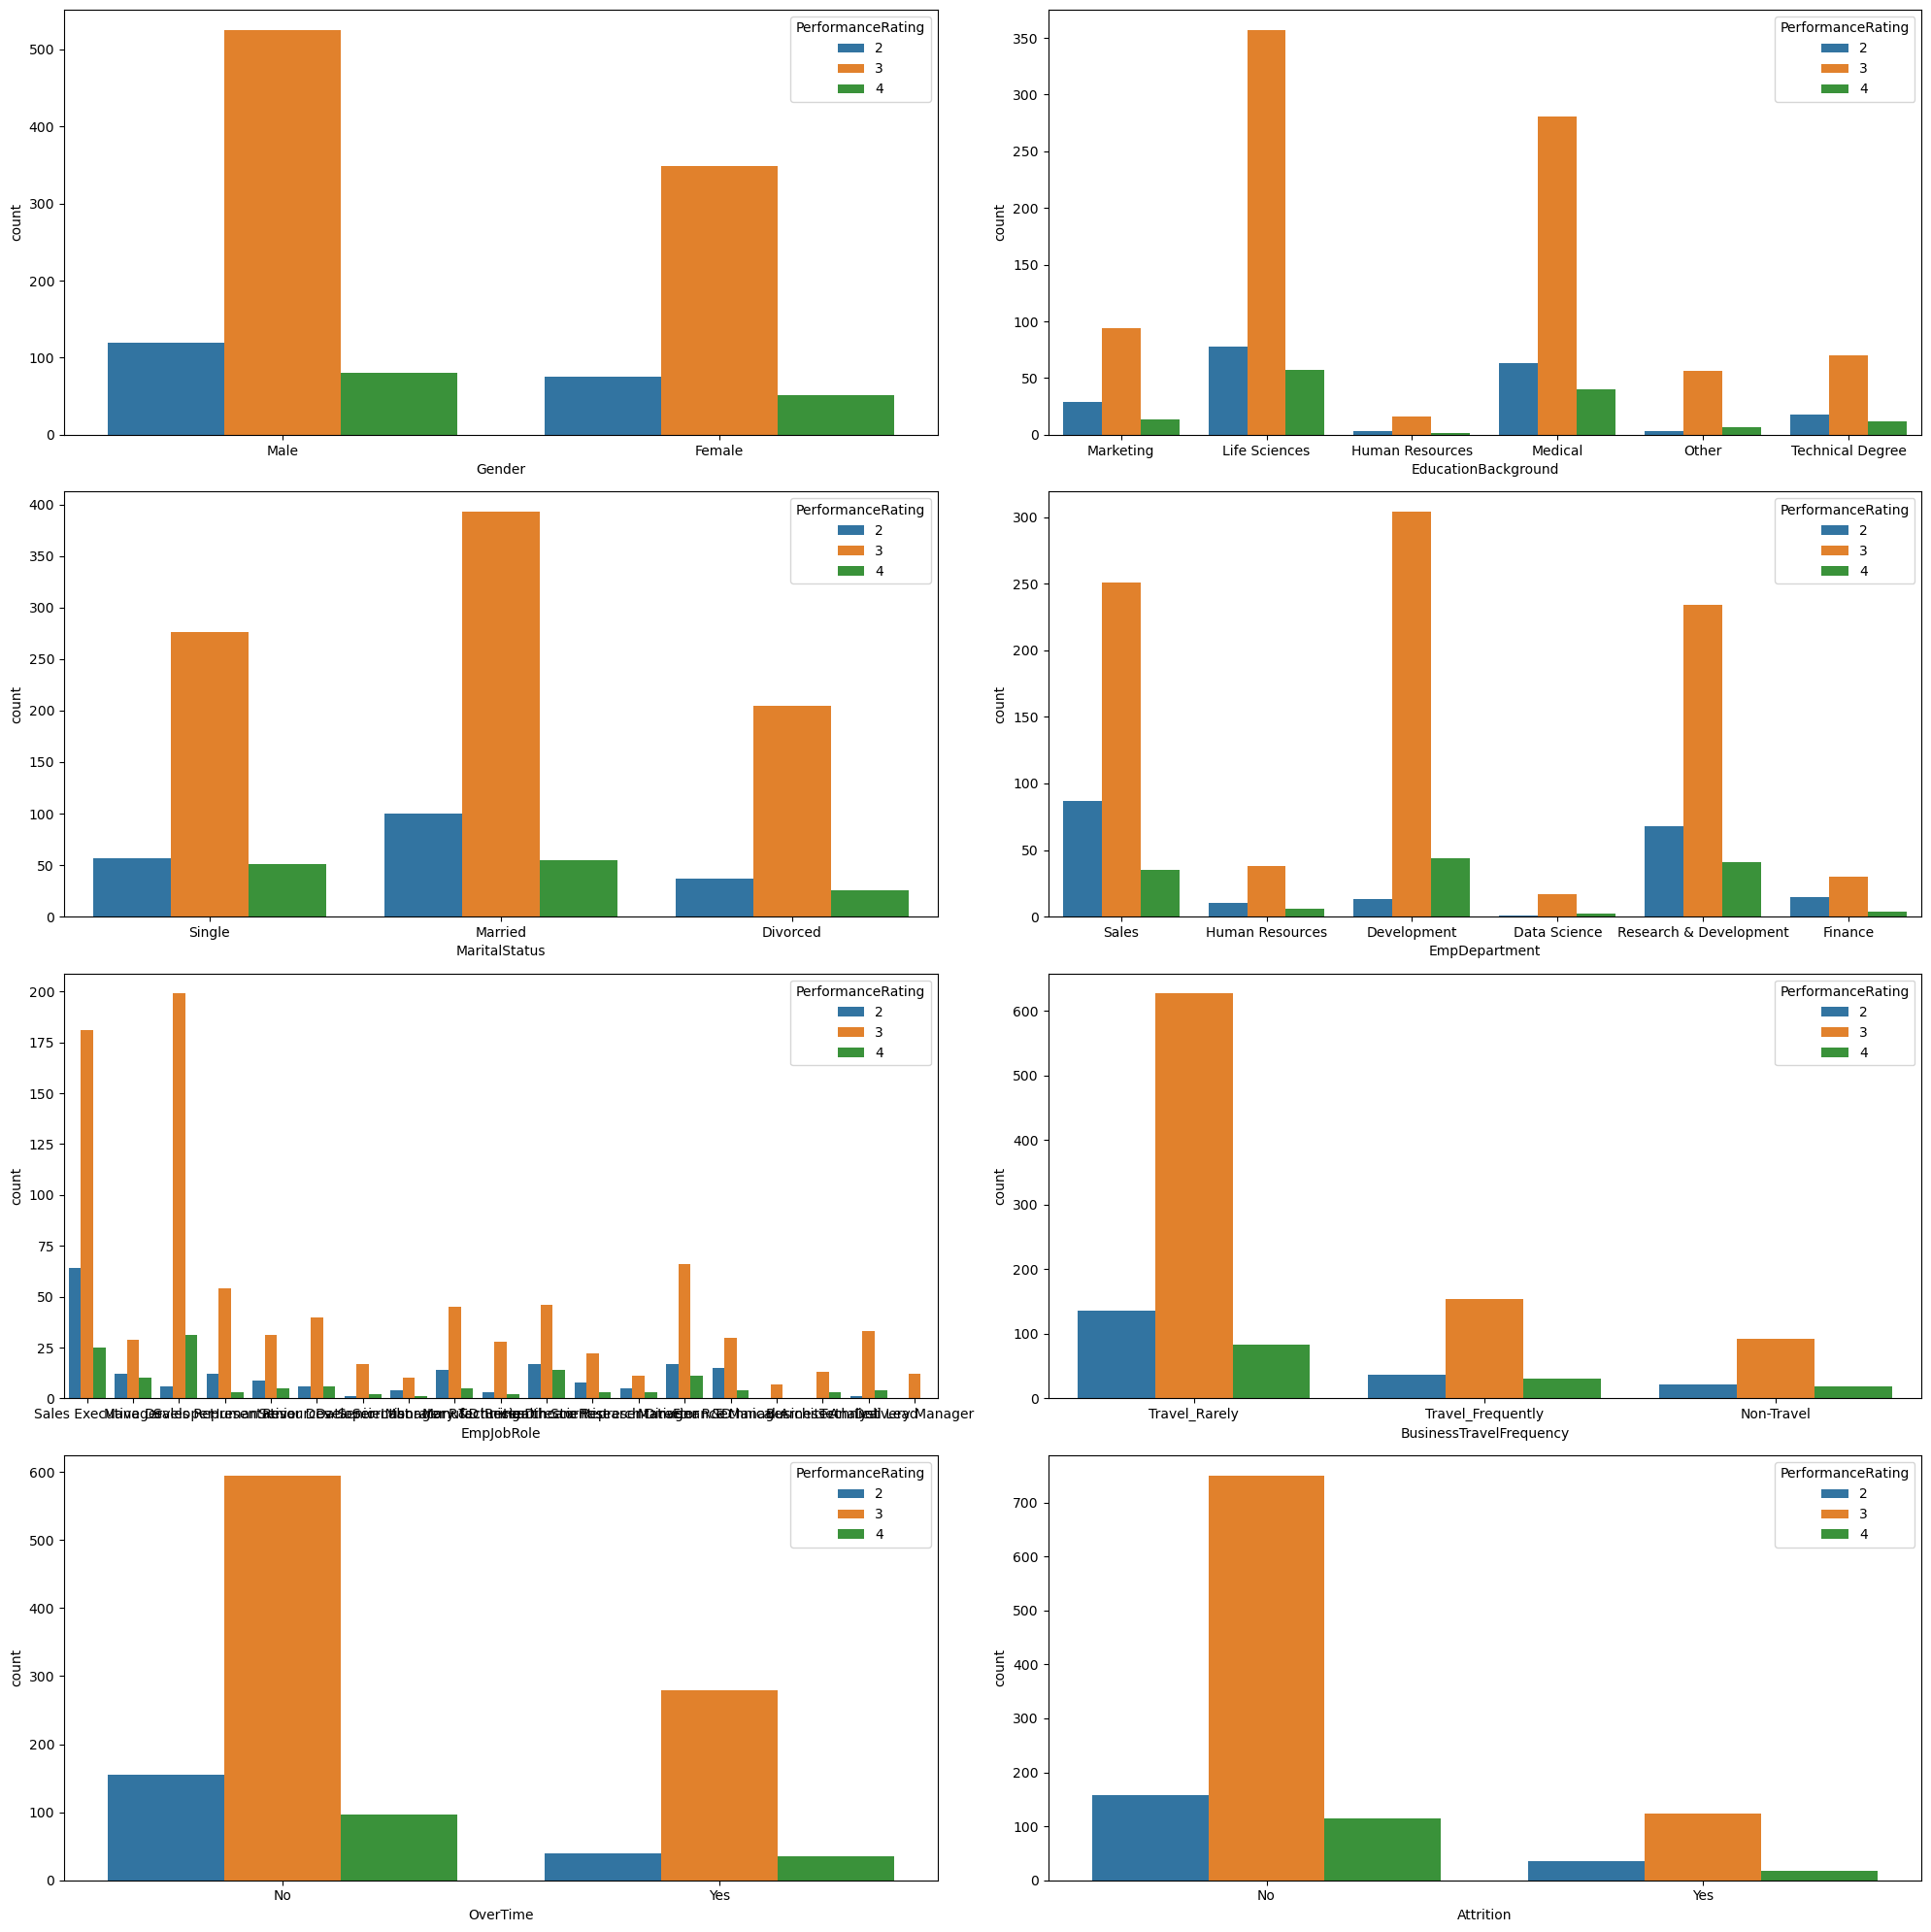

In [14]:
# plotting count plot
plt.figure(figsize=(20,20))
plotnumber=1
for i in cat_data.drop('EmpNumber',axis=1):
  if plotnumber<=8:
    ax=plt.subplot(4,2,plotnumber)
    sns.countplot(data=data,x=data[i],hue=data['PerformanceRating'])
  plotnumber+=1
plt.tight_layout()

## Key Findings from Bivariate Analysis of Categorical Variables and Performance Ratings

* Regarding gender, since the dataset contains more male employees, male employees generally received higher performance ratings than female employees.

* In terms of education background, employees with a background in medical and life sciences tended to have higher performance ratings.

* Considering marital status, married employees tended to have higher performance ratings compared to others.

* For employees with rare business travel frequency, their performance ratings were excellent and outstanding.

* Employees who did not work overtime generally received excellent and outstanding performance ratings.

* Employees who did not leave the company tended to have excellent and outstanding performance ratings.